# Esame Laboratorio di Programmazione II - 27/06/2025


## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [7]:
import numpy as np

# Creo l'array con i prezzi forniti nella traccia
prezzi = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30])

# 1. CALCOLO IL PREZZO MEDIO usando il metodo .mean() di Numpy
media_prezzi = prezzi.mean()
print(f"Prezzo medio: {media_prezzi:.2f}€")

# 2. SELEZIONO I LIBRI con Prezzo > Media (Indicizzazione Booleana)
libri_sopra_media = prezzi[prezzi > media_prezzi]
print(f"Libri sopra la media: {libri_sopra_media.tolist()}")     # Uso .tolist() per stampare con virgole

# 3. CREO UN NUOVO ARRAY che applica uno sconto del 10% solo ai libri che costano di più della media

# Creo una copia per non modificare l'originale
prezzi_scontati = prezzi.copy()

# Uso l'indicizzazione booleana per identificare le posizioni e applicare lo sconto (solo se la condizione prezzi_scontati > media_prezzi è TRUE)
prezzi_scontati[prezzi_scontati > media_prezzi] *= 0.9

# Stampo i nuovi prezzi (utilizzo np.round per visualizzare solo 2 decimali e converto in lista per avere le virgole nel print)
print(f"Nuovi prezzi (scontati solo i sopra media): {np.round(prezzi_scontati, 2). tolist()}")


Prezzo medio: 18.98€
Libri sopra la media: [22.5, 31.2, 24.9, 19.99, 27.3]
Nuovi prezzi (scontati solo i sopra media): [14.99, 20.25, 9.75, 18.0, 28.08, 12.8, 22.41, 8.4, 17.99, 24.57]


## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

Primi 20 risultati: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]
Ultime 5 proporzioni cumulative: [0.352, 0.352, 0.342, 0.335, 0.335]


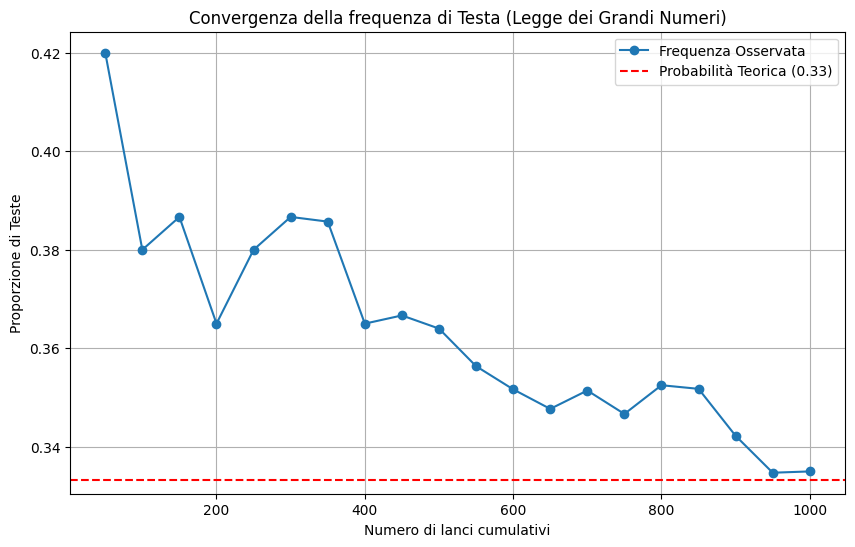

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 1. CONFIGURAZIONE DELLE PROBABILITA'

# Calcolo teorico: P(Testa) = 1/3, P(Croce) = 2/3
prob_testa = 1/3
prob_croce = 2/3
n_lanci = 1000

# Generazione dei lanci (1 = Testa, 0 = Croce)
lanci = np.random.choice([1, 0], size=n_lanci, p=[prob_testa, prob_croce])

# Stampo i primi 20 lanci convertendo in lista per avere le virgole
print(f"Primi 20 risultati: {lanci[:20].tolist()}")

# 2. CALCOLO PROPORZIONE DI TESTE dopo ogni 50 lanci cumulativi

# Definisco gli step: 50, 100, 150... fino a 1000 usando range()
step_lanci = list(range(50, n_lanci + 1, 50))
proporzioni = []

# Ciclo attraverso gli step definiti
for n in step_lanci:
    # Seleziono i lanci all'inizio fino all'n-esimo (Slicing cumulativo)
    sottogruppo = lanci[:n]

    # Calcolo la media del sottogruppo
    media_corrente = sottogruppo.mean()
    proporzioni.append(media_corrente)

# Stampo le ultime 5 proporzioni calcolate, arrotondate
print(f"Ultime 5 proporzioni cumulative: {np.round(proporzioni[-5:], 3).tolist()}")

# 3. GRAFICO della proposizione cumulativa nel tempo
plt.figure(figsize=(10, 6))

# Plot dell'andamento osservato (la linea che osscilla e poi si stabilizza)
plt.plot(step_lanci, proporzioni, marker='o', label= 'Frequenza Osservata')

# Aggiungo la linea orizzontale della probabilità teorica (1/3 = 0.33)
plt.axhline(y=prob_testa, color='red', linestyle= '--', label='Probabilità Teorica (0.33)')

# Aggiungo titoli ed etichette agli assi
plt.title('Convergenza della frequenza di Testa (Legge dei Grandi Numeri)')
plt.xlabel('Numero di lanci cumulativi')
plt.ylabel('Proporzione di Teste')
plt.legend()
plt.grid(True)

# Mostro il grafico
plt.show()


## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [16]:
import numpy as np

# Definisco la funzione richiesta che prende in input una matrice
def mat_normalizzata(matrice):
    # 1. CALCOLO MEDIA e DEVIAZIONE STANDARD dell'intera matrice
    media = np.mean(matrice)
    dev_std = np.std(matrice)

    # 2. NORMALIZZO la matrice (formula: Z = (X - mu) / sigma)
    matrice_norm = (matrice - media) / dev_std

    return matrice_norm

# --- TEST DELLA FUNZIONE ---

# Imposto un seed per avere risultati riproducibili
np.random.seed(42)

# Genero un array Numpy 6x10 campionato da una distribuzione normale
dati_input = np.random.normal(loc=5, scale=2, size=(6, 10))

# Applico la funzione creata
dati_output = mat_normalizzata(dati_input)

# --- VERIFICA DI RISULTATI ---
# Se la normalizzazione ha funzionato, la nuova media deve essere circa 0 e la dev.std circa 1

print("--- DATI ORIGINALI ---")
print(f"Media (target 5): {np.mean(dati_input):.2f}")
print(f"Dev. Std (target 2): {np.std(dati_input):.2f}")

print("\n--- DATI NORMALIZZATI ---")
print(f"Media (target 0): {np.mean(dati_output):.2f}")     # Sarà un numero piccolissimo, tipo 0.000...
print(f"Dev. Std (target 1): {np.std(dati_output):.2f}")



--- DATI ORIGINALI ---
Media (target 5): 4.69
Dev. Std (target 2): 1.80

--- DATI NORMALIZZATI ---
Media (target 0): -0.00
Dev. Std (target 1): 1.00


## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


Prime 5 righe con la nuova colonna:
                                                      title  average_rating  ratings_count  engagement_score
0                   The Hunger Games (The Hunger Games, #1)            4.34        4780653         28.988975
1  Harry Potter and the Sorcerer's Stone (Harry Potter, #1)            4.44        4602479         29.583684
2                                   Twilight (Twilight, #1)            3.57        3866839         23.516862
3                                     To Kill a Mockingbird            4.25        3198671         27.646121
4                                          The Great Gatsby            3.89        2683664         25.007753

Libro con engagement score più alto: Harry Potter and the Sorcerer's Stone (Harry Potter, #1) (Score: 29.58)

Numero di libri con rating > 4.5: 129


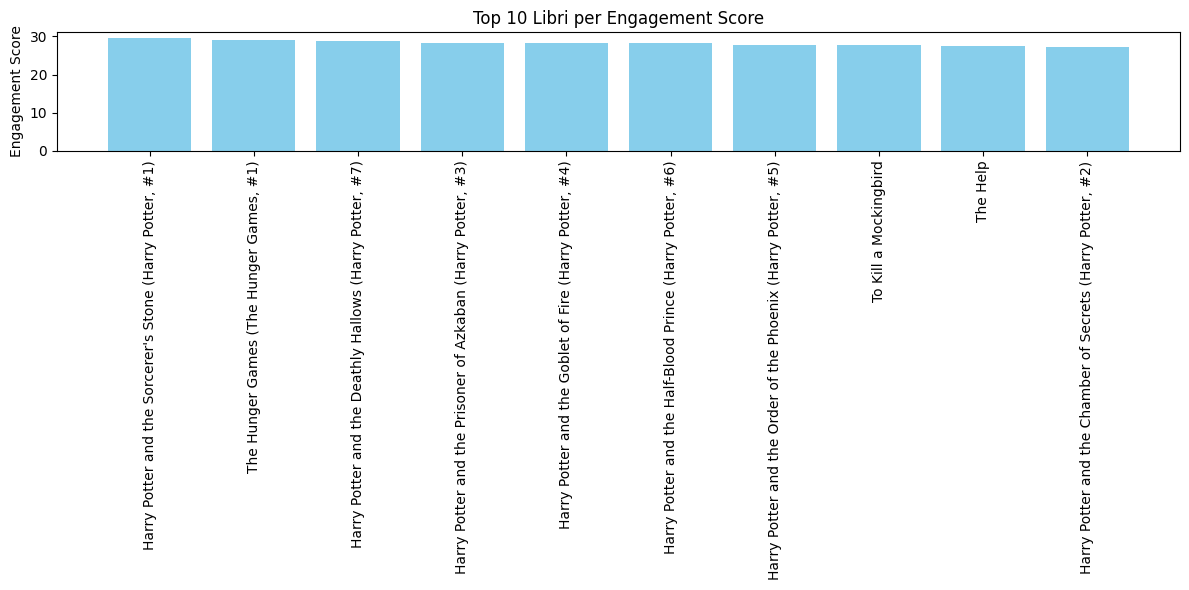

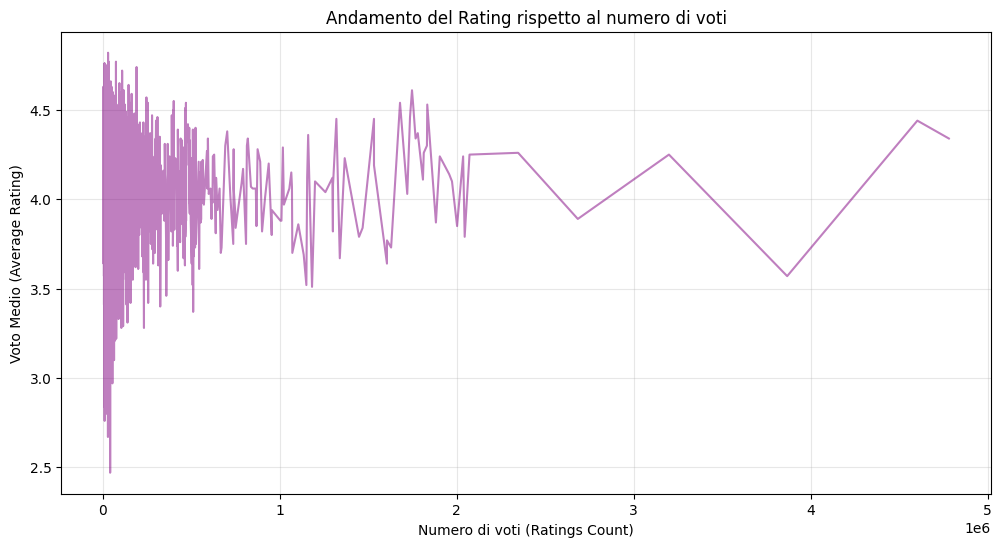

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carico il dataset
df = pd.read_csv('books.csv')

# --- 1. CREAZIONE NUOVA COLONNA --- (uso la formula: score = rating * log10(1 + count))
# Uso np.log10 di NumPy per il logaritmo in base 10. Aggiungo 1 a ratings_count per evitare il logaritmo di zero
df['engagement_score'] = df['average_rating'] * np.log10(1 + df['ratings_count'])

# Stampo le prime righe per vedere se la colonna è stata creata
print("Prime 5 righe con la nuova colonna:")
print(df[['title', 'average_rating', 'ratings_count', 'engagement_score']].head().to_string())


# --- 2. TROVARE IL LIBRO con engagement_score massimo ---
# Uso idxmax() che restituisce l'INDICE della riga con il valore massimo.
# Poi uso .loc[] per estrarre l'intera riga corrispondente a quell'indice.
indice_max = df['engagement_score'].idxmax()
libro_top = df.loc[indice_max]

# Stampo
print(f"\nLibro con engagement score più alto: {libro_top['title']} (Score: {libro_top['engagement_score']:.2f})")


# --- 3. FILTRO i libri con valutazione > 4.5 ---
libri_eccellenti = df[df['average_rating'] > 4.5]

# Stampo
print(f"\nNumero di libri con rating > 4.5: {len(libri_eccellenti)}")

# --- 4. GRAFICO A BARRE dei top 10 libri per engagement ---

# -> a. Ordino il dataframe in ordine decrescente in base allo score
# -> b. Prendo i primi 10 libri con .head(10)
top_10_engagement = df.sort_values(by='engagement_score', ascending=False).head(10)

# Ingrandisco la figura per leggere bene i titoli
plt.figure(figsize= (12, 6))

# Creo il bar plot
plt.bar(top_10_engagement['title'], top_10_engagement['engagement_score'], color='skyblue')

# Ruoto i titoli sull'asse X di 45 o 90 gradi altrimenti si sovrappongono e non si legge nulla
plt.xticks(rotation=90)
plt.title('Top 10 Libri per Engagement Score')
plt.ylabel('Engagement Score')

# Aggiusto i margini per non tagliare le etichette ruotate
plt.tight_layout()
plt.show()

# 5. GRAFICO A LINEE
df_sorted = df.sort_values(by='ratings_count', ascending=True)

# Ingrandisco i titoli
plt.figure(figsize=(12, 6))

# Plotto la average_rating.
plt.plot(df_sorted['ratings_count'], df_sorted['average_rating'], color='purple', alpha=0.5)

# Metto le etichette
plt.title('Andamento del Rating rispetto al numero di voti')
plt.xlabel('Numero di voti (Ratings Count)')
plt.ylabel('Voto Medio (Average Rating)')
plt.grid(True, alpha=0.3) # Griglia leggera per aiutare la lettura

# Mostro il grafico
plt.show()





## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


Dimensioni dataset: 32561 righe, 15 colonne

Valori mancanti per colonna (prima della pulizia):
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Pulizia completata. Valori mancanti residui in 'workclass': 0

Età media per sesso:
sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

Percentuale di persone con reddito >50K per sesso:
sex
Female    0.0
Male      0.0
Name: is_rich, dtype: float64


C:\Users\kokin\AppData\Local\Temp\ipykernel_16868\2647865557.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rich_by_age = df.groupby('age_group')['is_rich'].mean() * 100


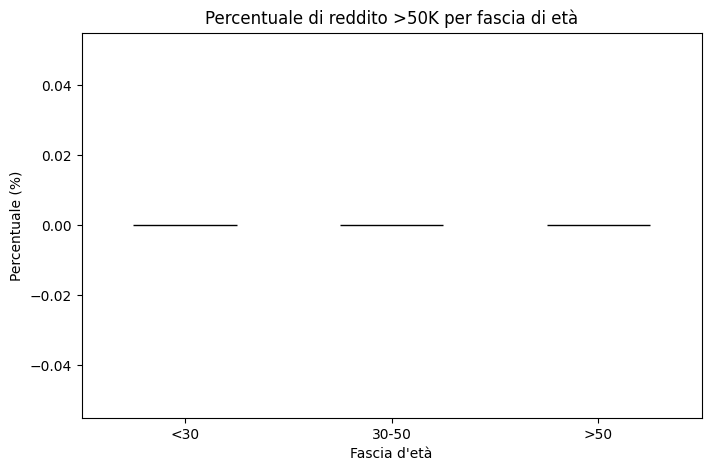

C:\Users\kokin\AppData\Local\Temp\ipykernel_16868\2647865557.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y='hours_per_week', palette='Set2')


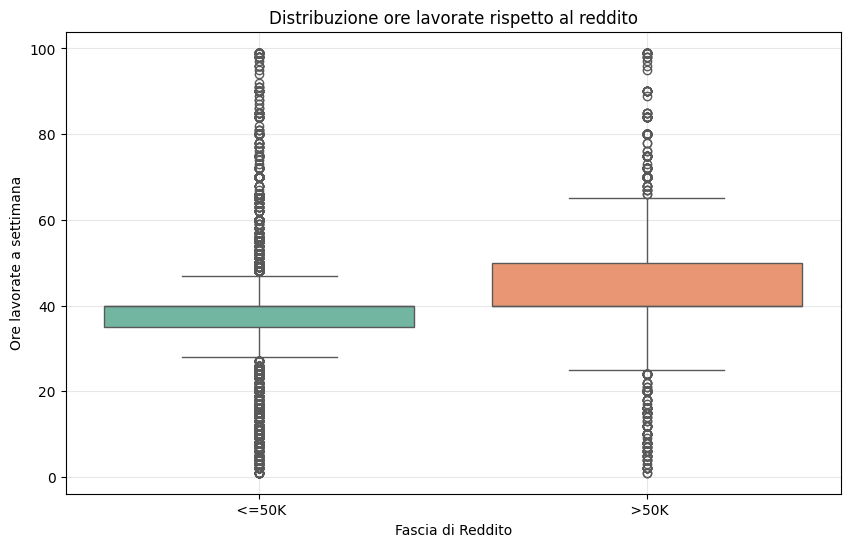

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. DIMENSIONE DEL DATASET ---

# Carico il dataset
df = pd.read_csv('adult_con_titoli.csv', na_values='?')

# Pulisco i nomi delle colonne
df.columns = df.columns.str.strip().str.replace('-', '_')

# Stampo righe e colonne usando l'attributo .shape
n_righe, n_colonne = df.shape
print(f"Dimensioni dataset: {n_righe} righe, {n_colonne} colonne")

# --- 2. CONTEGGIO VALORI MANCANTI ---

# is.null() crea una maschera True/False, .sum() conta i True per ogni colonna
print("\nValori mancanti per colonna (prima della pulizia):")
print(df.isnull().sum())

# --- 3. SOSTITUZIONE DEI VALORI MANCANTI con la MODA ---
colonne_da_pulire = ['workclass', 'occupation', 'native_country']

for col in colonne_da_pulire:
    # Calcolo la MODA (Il valore che appare più spesso)
    moda = df[col].mode()[0]                 # .mode() restituisce una Series, prendo il primo elemento [0]

    # Sostituisco i NaN con la MODA
    df[col] = df[col].fillna(moda)      

# Stampo
print(f"\nPulizia completata. Valori mancanti residui in 'workclass': {df['workclass'].isnull().sum()}")

# --- 4. ETA' MEDIA PER SESSO ---

# Raggruppo per 'sex' e calcolo la media della colonna 'age'
eta_media_sesso = df.groupby('sex')['age'].mean()

# Stampo
print("\nEtà media per sesso:")
print(eta_media_sesso)

# --- 5. PERCENTUALE DI PERSONE RICCHE (>50k) per sesso ---

# Creo una colonna numerica di comodo: 1 se guadagna >50k, 0 altrimenti
df['is_rich'] = (df['income'].str.strip() == '>50k').astype(int)

# Calcolo la media di questa colonna binaria per ogni sesso e moltiplicato per 100
perc_ricchi = df.groupby('sex')['is_rich'].mean() * 100

# Stampo
print("\nPercentuale di persone con reddito >50K per sesso:")
print(np.round(perc_ricchi, 2))

# --- 6. CREAZIONE fasce d'età (Binning) ---

# Definisco i limiti delle fasce (bins) e i nomi (labels)
bins = [0, 30, 50, 100]
labels = ['<30', '30-50', '>50']

# pd.cut divide la variabile continua 'age' in intervalli discreti
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


# --- 7. GRAFICI ---

# A) Grafico a barre: % ricchi per fascia d'età
rich_by_age = df.groupby('age_group')['is_rich'].mean() * 100

plt.figure(figsize=(8, 5))
rich_by_age.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Percentuale di reddito >50K per fascia di età')
plt.ylabel('Percentuale (%)')
plt.xlabel('Fascia d\'età')
plt.xticks(rotation=0) # Tengo le etichette orizzontali
plt.show()

# B) Boxplot: Ore lavorate per reddito
plt.figure(figsize=(10, 6))

# Uso Seaborn per il boxplot perché gestisce nativamente la divisione per categorie
sns.boxplot(data=df, x='income', y='hours_per_week', palette='Set2')

plt.title('Distribuzione ore lavorate rispetto al reddito')
plt.xlabel('Fascia di Reddito')
plt.ylabel('Ore lavorate a settimana')
plt.grid(True, alpha=0.3)
plt.show()

## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.

Parametri Reali: a=2.5, b=1.2
Parametri Stimati: a=2.51, b=1.11
MAE: 0.38
RMSE: 0.48


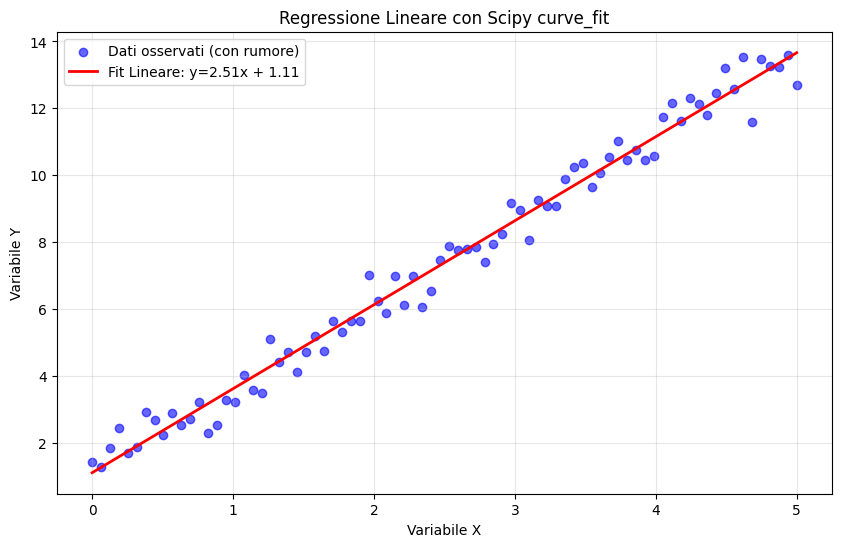

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 1 . STIMO I PARAMETRI DELLA RETTA ---

# A. Generazione dei dati
np.random.seed(42)

# Creo 80 punti tra 0 e 5
x = np.linspace(0, 5, 80)

# Genero la y usando la formula: y = 2.5*x + 1.2 + rumore
y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)


# B. Definisco il modello -> Devo dire a curve_fit che forma cercare. Qui cerco una retta: y = ax + b
def modello_lineare(x, a, b):
    return a * x + b

# C. Stima dei parametri con curve_fit
# curve_fit restituisce due cose:
# - popt: i parametri ottimizzati (a e b ideali)
# - pcov: la matrice di covarianza (che ignoriamo usando _)
popt, _ = curve_fit(modello_lineare, x, y)

# Estraggo i coefficienti trovati (a = pendenza, b = intercetta)
a_stimato, b_stimato = popt

print(f"Parametri Reali: a=2.5, b=1.2")
print(f"Parametri Stimati: a={a_stimato:.2f}, b={b_stimato:.2f}")


# D. Calcolo delle predizioni -> Uso i parametri appena trovati per disegnare la retta "perfetta" secondo il modello
y_pred = modello_lineare(x, a_stimato, b_stimato)

# --- 2 . CALCOLO METRICHE DI ERRORE (MAE e RMSE) ---

# MAE: Errore medio assoluto (quanto sbaglio in media?)
mae = mean_absolute_error(y, y_pred)

# RMSE: Radice dell'errore quadratico medio (penalizza di più gli errori grandi).
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Stampo
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


# --- 3. FACCIO IL GRAFICO ---
plt.figure(figsize=(10, 6))

# Disegno i punti originali (scatter)
plt.scatter(x, y, label='Dati osservati (con rumore)', color='blue', alpha=0.6)

# Disegno la retta stimata (plot)
plt.plot(x, y_pred, label=f'Fit Lineare: y={a_stimato:.2f}x + {b_stimato:.2f}', color='red', linewidth=2)

# Aggiungo dettagli al grafico
plt.title('Regressione Lineare con Scipy curve_fit')
plt.xlabel('Variabile X')
plt.ylabel('Variabile Y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()